In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
data=pd.read_csv('/content/shoe.csv')

In [128]:
data

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male
5,9.150,Female
6,9.450,Female
7,10.570,Male
8,9.710,Female
9,9.650,Female


In [129]:
df=data.copy()
df2=data.copy()
df3=data.copy()
df4=data.copy()

In [130]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [131]:
df.describe()

,size(cm)
count,40.000000
mean,10.067375
std,0.532646
min,9.150000
25%,9.615000
50%,10.137500
75%,10.482500
max,11.050000


In [132]:
df.isnull().sum()

size(cm)    0
class(y)    0
dtype: int64

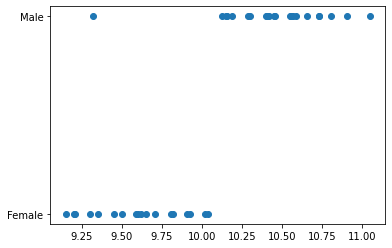

In [133]:
plt.scatter(df['size(cm)'],df['class(y)']);

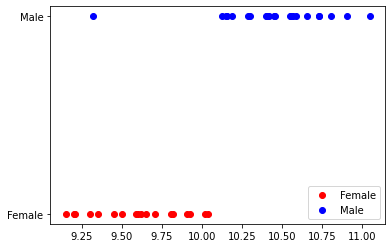

In [134]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'], color='red', label='Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color='blue', label='Male')

plt.legend()

**Preprossing**

In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [136]:
from pandas.core.dtypes.common import is_numeric_dtype

In [137]:
for col in df.columns:
  if is_numeric_dtype(df[col]):
    continue
  df[col] = le.fit_transform(df[col])

In [138]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


#Spliting Dataset

In [139]:
x=df[['size(cm)']]
y=df['class(y)']

In [140]:
from sklearn.model_selection import train_test_split

In [198]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=1)

In [199]:
xtrain.head()

,size(cm)
30,10.04
36,9.21
33,9.59
28,10.45
4,11.05


In [200]:
ytrain.head()

30    0
36    0
33    0
28    1
4     1
Name: class(y), dtype: int64

# **Logistic regression**

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
logreg=LogisticRegression()

In [203]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [204]:
logreg.coef_

array([[2.47032006]])

In [205]:
logreg.intercept_

array([-24.68727138])

In [206]:
logreg.predict_proba(xtest)

array([[0.26332448, 0.73667552],
       [0.55141748, 0.44858252],
       [0.61145481, 0.38854519],
       [0.83058498, 0.16941502],
       [0.11744111, 0.88255889],
       [0.13952234, 0.86047766],
       [0.87656832, 0.12343168],
       [0.84075928, 0.15924072],
       [0.18642364, 0.81357636],
       [0.32468537, 0.67531463],
       [0.26814446, 0.73185554],
       [0.53916788, 0.46083212]])

In [207]:
logreg.predict(xtest)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [208]:
ytest

2     1
31    0
3     0
21    0
27    1
29    1
22    0
39    1
19    1
26    1
32    1
17    0
Name: class(y), dtype: int64

In [221]:
log_score=logreg.score(xtest,ytest)
log_score

0.9166666666666666

## **KNN Classifier**

In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
knn = KNeighborsClassifier()

In [212]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [213]:
knn.predict_proba(xtest)   

array([[0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2]])

In [214]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [222]:
knn_score=knn.score(xtest,ytest)     
knn_score   

0.9166666666666666

# KNN Regressor

In [223]:
from sklearn.neighbors import KNeighborsRegressor

In [224]:
knr = KNeighborsRegressor(n_neighbors=2)

In [225]:
kn=knr.fit(xtest,ytest)


In [226]:
print(kn)

KNeighborsRegressor(n_neighbors=2)


In [227]:
knr.predict(xtest)    # prediction

array([1. , 0. , 0. , 0.5, 1. , 1. , 0.5, 0.5, 1. , 1. , 1. , 0. ])

In [228]:
knn_r2_score=knr.score(xtest,ytest)
knn_r2_score                                 # accuracy score

0.7428571428571429

# **Plot Accuracy**

In [229]:
d = {'Algorithm name': ['logistic_Regression','KNN classifier','KNN Regressor'], 'Accuracy': [log_score,knn_score,knn_r2_score]}

In [230]:
df=pd.DataFrame(d)

In [231]:
df

,Algorithm name,Accuracy
0,logistic_Regression,0.916667
1,KNN classifier,0.916667
2,KNN Regressor,0.742857


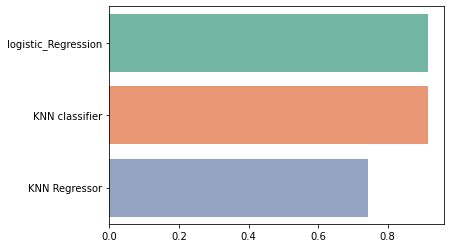

In [232]:
sns.barplot(y="Algorithm name",x="Accuracy",data=d,palette="Set2")